### Data Analysis using Python

import pandas as pd
import numpy as np

df = pd.read_csv(path)
df.head()
df.tail()
df.columns
df.isna()
df.dropna()
df.describe()
df.dtypes
df.info
df.to_csv(path)

### Data Wrangling

### EDA

### Basic Modeling

# Assignment

Find Heatmap of correlation
Linear Regression for Target
Test it on train set and find RMSE of predicted and actual target

In [243]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()

In [244]:
dfx = pd.DataFrame(boston.data)
dfx.columns = boston.feature_names
dfx.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [245]:
dfy = pd.DataFrame(boston.target, columns=["target"])
dfy.head()

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [246]:
dfx.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [247]:
dfx.describe(include="all")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [248]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

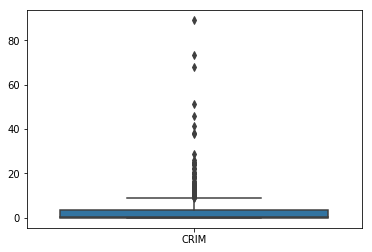

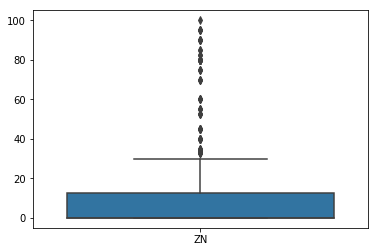

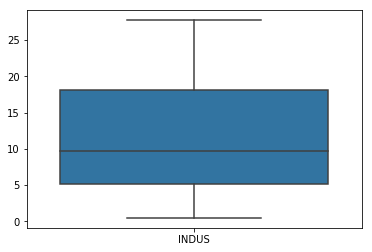

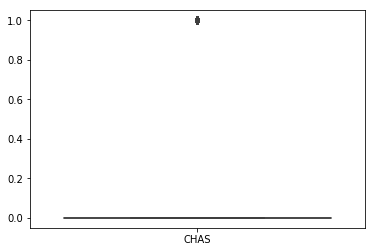

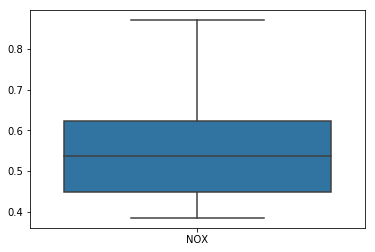

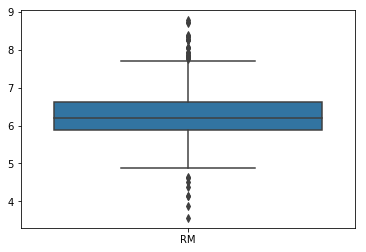

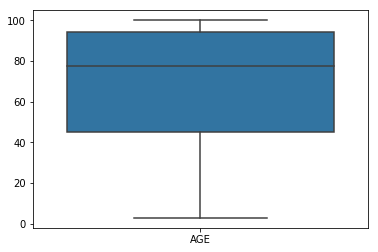

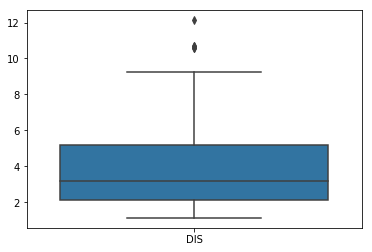

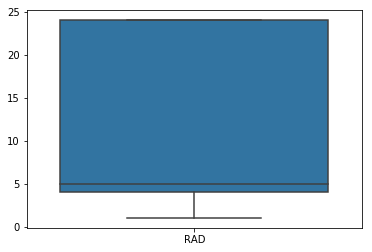

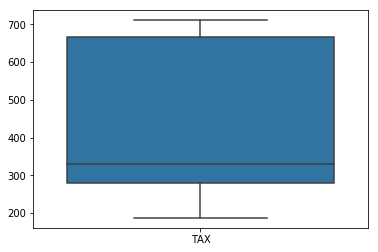

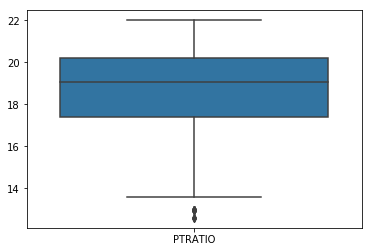

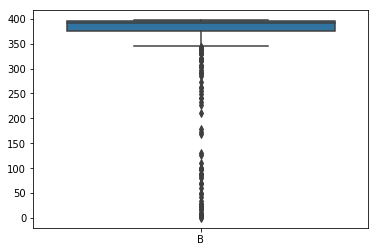

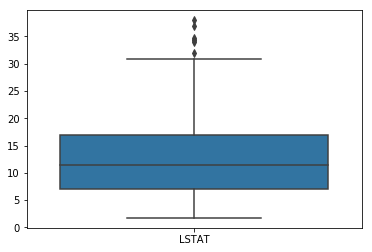

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

for index, col in enumerate(dfx.columns) :
    sns.boxplot(data=dfx[[col]])
    plt.show()

### Without removing outliers

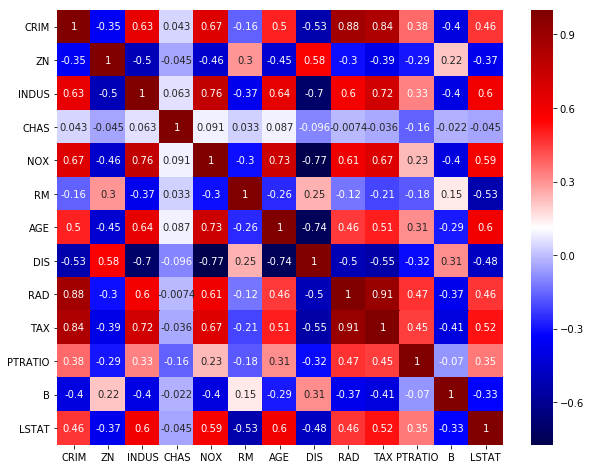

In [272]:
plt.figure( figsize=(10, 8) )
sns.heatmap(dfx.corr(), cmap="seismic", annot=True)

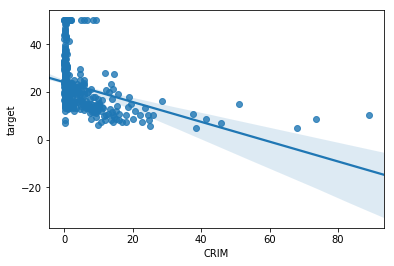

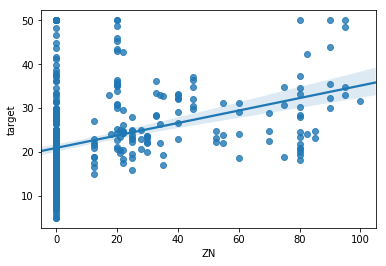

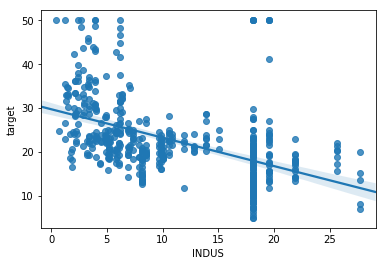

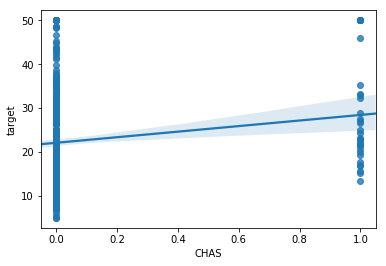

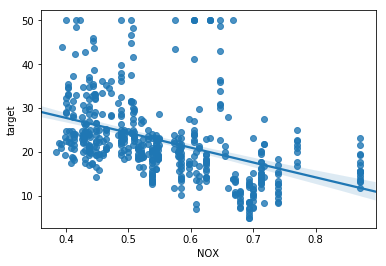

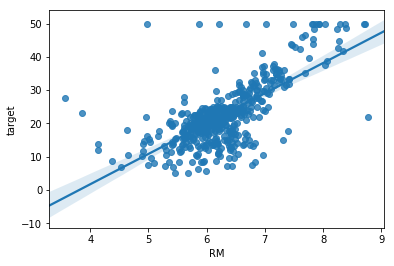

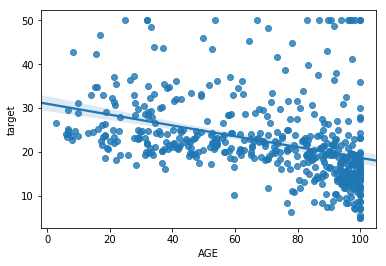

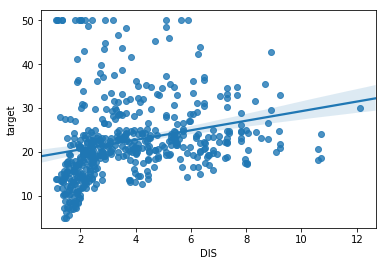

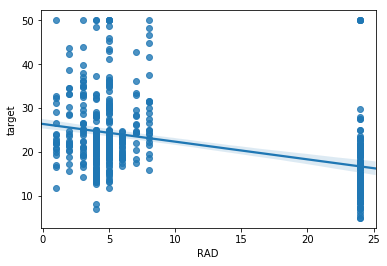

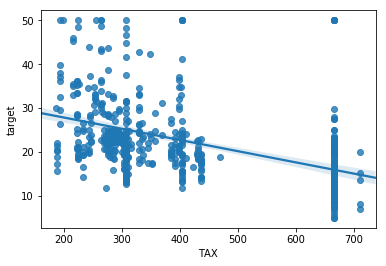

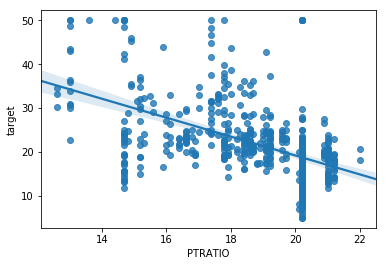

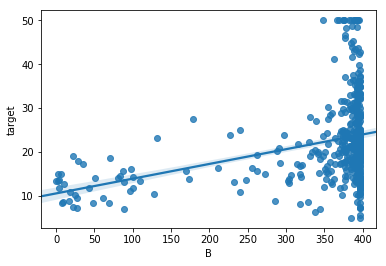

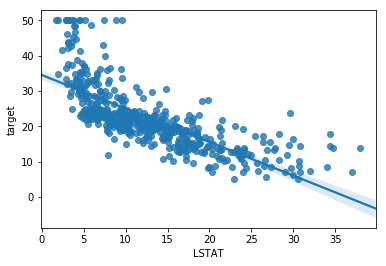

In [251]:
for col in dfx.columns :
    sns.regplot( x=dfx[col], y=dfy["target"] )
    plt.show()

# pd.concat([ dfx["CRIM"], dfy ], axis=1)

In [252]:
type(dfy)
# dfy.shape
# ["ZN", "INDUS", "NOX", "RM", "AGE", "LSTAT"]
useful_cols = dfx.columns
# dfx.drop("CHAS", axis=1)

### Linear Regression on data with outliers

In [253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(dfx[useful_cols], dfy )
y_pred = lm.predict(dfx[useful_cols])

print( np.sqrt( mean_squared_error( y_pred, dfy ) ) )
lm.score( dfx[useful_cols], dfy )

4.679191295697281


0.7406426641094095

### Removing Outliers

In [254]:
# dfx["CRIM"][0]
dfx_without_outliers = dfx
for col in dfx.columns :
    
    Q1 = dfx_without_outliers[col].quantile(0.25)
    Q2 = dfx_without_outliers[col].quantile(0.50)
    Q3 = dfx_without_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    mean = dfx_without_outliers[col].mean()
    
    for i in range(dfx.shape[0]) :
        if (dfx_without_outliers[col][i] < Q1 - 1.5 * IQR) | (dfx_without_outliers[col][i] > Q3 + 1.5 * IQR) :
            dfx_without_outliers[col][i] = mean
            
dfx_without_outliers.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.513365,4.290963,11.136779,0.004784,0.554695,6.236261,68.574901,3.724404,9.549407,408.237154,18.619630,383.831325,12.344884
std,2.144763,7.792239,6.860353,0.017569,0.115878,0.517629,28.148861,1.979785,8.707259,168.537116,1.936255,15.446343,6.631300
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.899750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.224500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.613524,11.363636,18.100000,0.000000,0.624000,6.515250,94.075000,5.112625,24.000000,666.000000,20.200000,396.225000,16.462500
max,8.982960,30.000000,27.740000,0.069170,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000


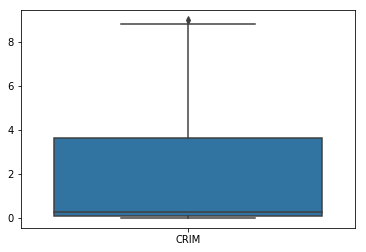

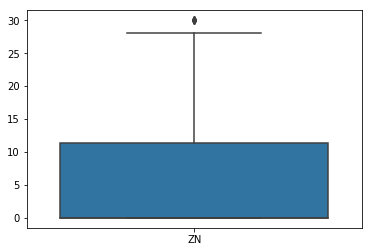

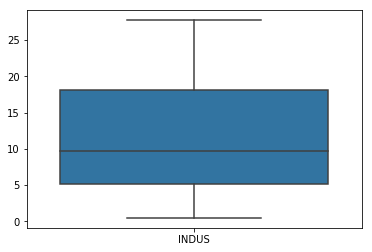

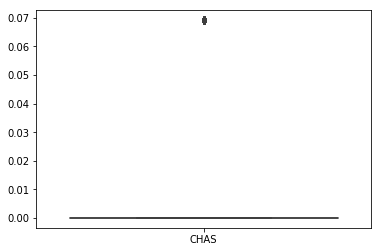

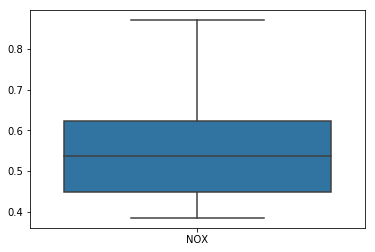

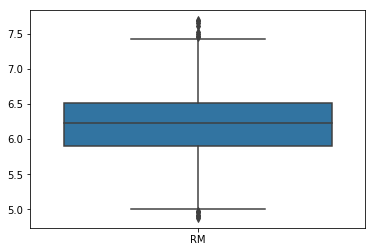

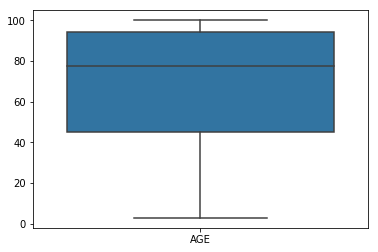

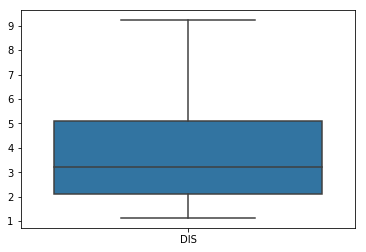

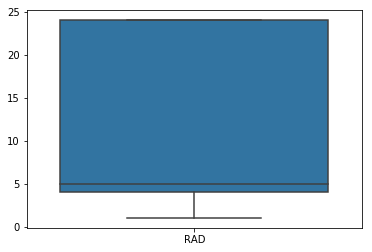

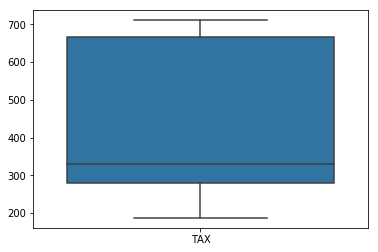

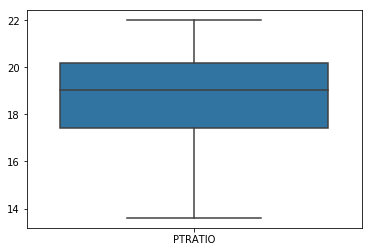

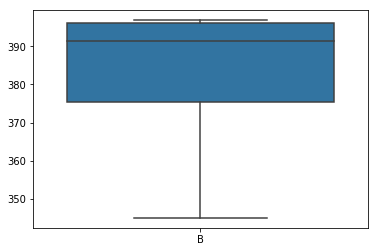

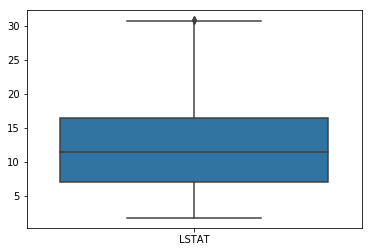

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

for index, col in enumerate(dfx_without_outliers.columns) :
    sns.boxplot(data=dfx_without_outliers[[col]])
    plt.show()

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
lm.fit(dfx_without_outliers, dfy)
y_pred = lm.predict(dfx_without_outliers)

print( np.sqrt( mean_squared_error(y_pred, dfy) ) )
lm.score(dfx_without_outliers, dfy)

5.332968479186174


0.6631046869355504

### Modifying to improve R^2 value

In [292]:
dfx1 = dfx.copy()
dfy1 = dfy.copy()
dfx1[["TAX", "B"]] = np.log( dfx1[["TAX", "B"]] )
dfy1 = np.log(dfy1)

In [293]:
lm1 = LinearRegression()
lm1.fit(dfx1, dfy1)
y_pred = lm1.predict(dfx1)

print( np.sqrt( mean_squared_error(y_pred, dfy1) ) )
lm1.score(dfx1, dfy1)

0.21421100446666755


0.7248226995449991